(dates-and-times)=
# Dates and Times

## Introduction

This chapter will show you how to work with dates and times in Python. At first glance, dates and times seem simple. You use them all the time in your regular life, and they don't seem to cause much confusion. However, the more you learn about dates and times, the more complicated they seem to get. To warm up, try these three seemingly simple questions:

-   Does every year have 365 days?
-   Does every day have 24 hours?
-   Does every minute have 60 seconds?

I'm sure you know that not every year has 365 days, but do you know the full rule for determining if a year is a leap year?

You might have remembered that many parts of the world use daylight savings time (DST), so that some days have 23 hours, and others have 25. You might not have known that some minutes have 61 seconds because every now and then leap seconds are added because the Earth's rotation is gradually slowing down.

Dates and times are hard because they have to reconcile two physical phenomena (the rotation of the Earth and its orbit around the sun) with a whole raft of geopolitical phenomena including months, time zones, and DST. 

This chapter won't teach you every last detail about dates and times, but it will give you a solid grounding of practical skills that will help you with common data analysis challenges. In particular, one code task related to time that we won’t cover here includes how to run scripts or functions at a given frequency, ie how to schedule jobs.


In [12]:
# remove cell
import matplotlib_inline.backend_inline
import matplotlib.pyplot as plt

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

### Prerequisites

You will need to install the **seaborn** package for this chapter. This chapter uses the next generation version of **seaborn**, which can be installed by running the following on the command line (aka in the terminal): 

```bash
pip install --pre seaborn
```

We will also be using the **pandas** package and numerical package **numpy**.

## Time in Python

A point in time as represented in data science is composed of a clock time and a date. These two elements are brought together as a *datetime*.

The datetime object is the fundamental time object in Python. It’s useful to know about these before moving on to datetime operations using **pandas** (which you’re far more likely to use in practice). Python's *datetime* objects capture the year, month, day, hour, second, and microsecond. Let’s import the class that deals with datetimes (whose objects are of type datetime.datetime) and take a look at it.

In [13]:
from datetime import datetime

now = datetime.now()
print(now)

2022-07-15 10:40:27.422029


Most people will be more used to working with day-month-year, while some people even have month-day-year, which clearly makes no sense at all! But note datetime follows [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601), the international standard for datetimes that has year-month-day-hrs:mins:seconds, with hours in the 24 hour clock format. This is the format you should use when coding too.

We can see that the variable we created has methods such as `year`, `month`, `day`, and so on, down to `microsecond`. When calling these methods on the `now` object we created, they will return the relevant detail. 

```{admonition} Exercise
Try calling the year, month, and day functions on an instance of `datetime.now()`.
```

Note that, once created, `now` does not refresh itself: it's frozen at the time that it was made.

## Creating Datetimes

### From Individual Components

To create a datetime using given numerical information the command is:

In [14]:
specific_datetime = datetime(2019, 11, 28)
print(specific_datetime)

2019-11-28 00:00:00


To make clearer and more readable code, you can also call this using keyword arguments: `datetime(year=2019, month=11, day=28)`.

### From a String

One of the most common transformations you're likely to need to do when it comes to times is the one from a string, like "4 July 2002", to a datetime. You can do this using `datetime.strptime`. Here's an example:

In [15]:
date_string = "16 February in 2002"
datetime.strptime(date_string, "%d %B in %Y")

datetime.datetime(2002, 2, 16, 0, 0)

What's going on? The pattern of the datestring is "day month 'in' year". Python's `strptime` function has codes for the different parts of a datetime (and the different ways they can be expressed). For example, if you had the short version of month instead of the long it would be:


In [16]:
date_string = "16 Feb in 2002"
datetime.strptime(date_string, "%d %b in %Y")

datetime.datetime(2002, 2, 16, 0, 0)

Of course, you don't always want to have to worry about the ins and outs of what you're passing in, and the built-in `dateutil` is here for flexible parsing of formats should you need that (explicit is better than implicit though!):

In [17]:
from dateutil.parser import parse

date_string = "03 Feb 02"
print(parse(date_string))
date_string = "3rd February 2002"
print(parse(date_string))

2002-02-03 00:00:00
2002-02-03 00:00:00


What about turning a datetime into a string? We can do that too, courtesy of the same codes.

In [18]:
now.strftime("%A, %m, %Y")

'Friday, 07, 2022'

You can find a close-to-comprehensive list of `strftime` codes at [https://strftime.org/](https://strftime.org/), but they're reproduced in the table below for convenience. 

| Code | Meaning | Example |
|-|-|-|
| %a | Weekday as locale’s abbreviated name. | Mon |
| %A | Weekday as locale’s full name. | Monday |
| %w | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday. | 1 |
| %d | Day of the month as a zero-padded decimal number. | 30 |
| %-d | Day of the month as a decimal number. (Platform specific) | 30 |
| %b | Month as locale’s abbreviated name. | Sep |
| %B | Month as locale’s full name. | September |
| %m | Month as a zero-padded decimal number. | 09 |
| %-m | Month as a decimal number. (Platform specific) | 9 |
| %y | Year without century as a zero-padded decimal number. | 13 |
| %Y | Year with century as a decimal number. | 2013 |
| %H | Hour (24-hour clock) as a zero-padded decimal number. | 07 |
| %-H | Hour (24-hour clock) as a decimal number. (Platform specific) | 7 |
| %I | Hour (12-hour clock) as a zero-padded decimal number. | 07 |
| %-I | Hour (12-hour clock) as a decimal number. (Platform specific) | 7 |
| %p | Locale’s equivalent of either AM or PM. | AM |
| %M | Minute as a zero-padded decimal number. | 06 |
| %-M | Minute as a decimal number. (Platform specific) | 6 |
| %S | Second as a zero-padded decimal number. | 05 |
| %-S | Second as a decimal number. (Platform specific) | 5 |
| %f | Microsecond as a decimal number, zero-padded on the left. | 000000 |
| %z | UTC offset in the form +HHMM or -HHMM (empty string if the the object is naive). |  |
| %Z | Time zone name (empty string if the object is naive). |  |
| %j | Day of the year as a zero-padded decimal number. | 273 |
| %-j | Day of the year as a decimal number. (Platform specific) | 273 |
| %U | Week number of the year (Sunday as the first day of the week) as a zero padded decimal number. | 39 |
| %W | Week number of the year (Monday as the first day of the week) as a decimal number. | 39 |
| %c | Locale’s appropriate date and time representation. | Mon Sep 30 07:06:05 2013 |
| %x | Locale’s appropriate date representation. | 09/30/13 |
| %X | Locale’s appropriate time representation. | 07:06:05 |
| %% | A literal '%' character. | % |

## Operations on Datetimes

Many of the operations you'd expect to just work with datetimes, do for example:

In [19]:
now > specific_datetime

True

As well as recording or comparing a *single* datetime, there are plenty of occasions when we'll be interested in *differences* in datetimes. Let's create one and then check its type.

In [20]:
time_diff = now - datetime(year=2020, month=1, day=1)
print(time_diff)

926 days, 10:40:27.422029


This is in the format of days, hours, minutes, seconds, and microseconds. Let's check the type with `type`:

In [21]:
type(time_diff)

datetime.timedelta

This is of type `datetime.timedelta`.

## Timezones



Date and time objects may be categorized as aware or naive depending on whether or not they include timezone information; an aware object can locate itself relative to other aware objects, but a naive object does not contain enough information to unambiguously locate itself relative to other date/time objects. So far we've been working with naive datetime objects.

The [**pytz**](https://pypi.org/project/pytz/) package can help you work with time zones. It has two main use cases: i) localise timezone-naive datetimes so that they become aware, ie have a timezone and ii) convert a datetimne in one timezone to another timezone.

The default timezone for coding is UTC. ‘UTC’ is Coordinated Universal Time. It is a successor to, but distinct from, Greenwich Mean Time (GMT) and the various definitions of Universal Time. UTC is now the worldwide standard for regulating clocks and time measurement.

All other timezones are defined relative to UTC, and include offsets like UTC+0800 - hours to add or subtract from UTC to derive the local time. No daylight saving time occurs in UTC, making it a useful timezone to perform date arithmetic without worrying about the confusion and ambiguities caused by daylight saving time transitions, your country changing its timezone, or mobile computers that roam through multiple timezones.

## Vectorised Datetimes 

Now we come to vectorised operations on datetimes using the powerful **numpy** packages (and this is what is used by **pandas**). **numpy** has its own version of datetime, called `np.datetime64`, and it's very efficient at scale. Let's see it in action:

In [22]:
import numpy as np

date = np.array("2020-01-01", dtype=np.datetime64)
date

array('2020-01-01', dtype='datetime64[D]')

The 'D' tells us that the smallest unit here is days. We can easily create a vector of dates from this object:

In [23]:
date + range(32)

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01'],
      dtype='datetime64[D]')

Note how the last day rolls over into the next month.

If you are creating a datetime with more precision than day, **numpy** will figure it out from the input, for example this gives resolution down to seconds.

In [24]:
np.datetime64("2020-01-01 09:00")

numpy.datetime64('2020-01-01T09:00')

One word of warning with **numpy** and datetimes though: the more precise you go, and you can go down to femtoseconds ($10^{-15}$ seconds), the more precise you go the smaller the range of dates you can hit. A popular choice of precision is `datetime64[ns]`, which can encode times from 1678 AD to 2262 AD. Working with seconds gets you 2.9$\times 10^9$ BC to 2.9$\times 10^9$ AD.

## Working with Datetimes in Data Frames

[**pandas**](https://pandas.pydata.org/) is the workhorse of time series analysis in Python. The basic object is a *timestamp*. The `pd.to_datetime` function creates timestamps from strings that could reasonably represent datetimes. Let's see an example of using `pd.to_datetime` to create a timestamp and then take a look at it.

In [25]:
import pandas as pd

date = pd.to_datetime("16th of February, 2020")
date

Timestamp('2020-02-16 00:00:00')

This is of type `Timestamp` and you can see that it has many of the same properties as the built-in Python `datetime.datetime` class from the previous chapter. As with that, the default setting for `tz` (timezone) and `tzinfo` is `None`. There are some extra properties, though, such as `freq` for frequency, which will be very useful when it comes to manipulating time *series* as opposed to just one or two datetimes.

### Creating and Using Time Series

There are two main scenarios in which you might be creating time series using **pandas**: i) creating one from scratch or ii) reading in data from a file. Let's look at a few ways to do i) first. 

You can create a time series with **pandas** by taking a date as created above and extending it using **pandas** timedelta function:

In [26]:
date + pd.to_timedelta(np.arange(12), "D")

DatetimeIndex(['2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27'],
              dtype='datetime64[ns]', freq=None)

This has created a datetime index of type `datetime65[ns]` (remember, an index is a special type of **pandas** column), where "ns" stands for nano-second resolution.

Another method is to create a range of dates (pass a frequency using the `freq=` keyword argument):

In [27]:
pd.date_range(start="2018/1/1", end="2018/1/8")

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

Another way to create ranges is to specify the number of periods and the frequency:

In [28]:
pd.date_range("2018-01-01", periods=3, freq="H")

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

Following the discussion of the previous chapter on timezones, you can also localise timezones directly in **pandas** dataframes:


In [29]:
dti = pd.date_range("2018-01-01", periods=3, freq="H").tz_localize("UTC")
dti.tz_convert("US/Pacific")

DatetimeIndex(['2017-12-31 16:00:00-08:00', '2017-12-31 17:00:00-08:00',
               '2017-12-31 18:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', freq='H')

Now let's see how to turn data that has been read in with a non-datetime type into a vector of datetimes. This happens *all the time* in practice. We'll read in some data on job vacancies for information and communication jobs, ONS code UNEM-JP9P, and then try to wrangle the given "date" column into a **pandas** datetime column.

In [31]:
import requests

url = "https://api.ons.gov.uk/timeseries/JP9P/dataset/UNEM/data"

# Get the data from the ONS API:
df = pd.DataFrame(pd.json_normalize(requests.get(url).json()["months"]))
df["value"] = pd.to_numeric(df["value"])
df = df[["date", "value"]]
df = df.rename(columns={"value": "Vacancies (ICT), thousands"})
df.head()

,date,"Vacancies (ICT), thousands"
0,2001 MAY,50
1,2001 JUN,48
2,2001 JUL,47
3,2001 AUG,46
4,2001 SEP,44


We have the data in. Let's look at the column types that arrived.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        252 non-null    object
 1   Vacancies (ICT), thousands  252 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


This is the default 'object' type, but we want the date column to have `datetime64[ns]`, which is a datetime type. Again, we use `pd.to_datetime`:

In [33]:
df["date"] = pd.to_datetime(df["date"])
df["date"].head()

0   2001-05-01
1   2001-06-01
2   2001-07-01
3   2001-08-01
4   2001-09-01
Name: date, dtype: datetime64[ns]

In this case, the conversion from the format of data that was put in of "2001 MAY" to datetime worked out-of-the-box. `pd.to_datetime` will always take an educated guess as to the format, but it won't always work out.

What happens if we have a more tricky-to-read-in datetime column? This frequently occurs in practice so it's well worth exploring an example. Let's create some random data with dates in an unusual format with month first, then year, then day, eg "1, '19, 29" and so on.

In [34]:
small_df = pd.DataFrame({"date": ["1, '19, 22", "1, '19, 23"], "values": ["1", "2"]})
small_df["date"]

0    1, '19, 22
1    1, '19, 23
Name: date, dtype: object

Now, if we were to run this via `pd.to_datetime` with no further input, it would misinterpret, for example, the first date as `2022-01-19`. So we must pass a bit more info to `pd.to_datetime` to help it out. We can pass a `format=` keyword argument with the format that the datetime takes. Here, we'll use `%m` for month in number format, `%y` for year in 2-digit format, and `%d` for 2-digit day. We can also add in the other characters such as `'` and `,`. You can find a list of datetime format identifiers above or over at [https://strftime.org/](https://strftime.org/).

In [35]:
pd.to_datetime(small_df["date"], format="%m, '%y, %d")

0   2019-01-22
1   2019-01-23
Name: date, dtype: datetime64[ns]

### Datetime Offsets

Our data, currently held in `df`, were read in as if they were from the *start* of the month but these data refer to the month that has passed and so should be for the *end* of the month. Fortunately, we can change this using a time offset.

In [36]:
df["date"] = df["date"] + pd.offsets.MonthEnd()
df.head()

,date,"Vacancies (ICT), thousands"
0,2001-05-31,50
1,2001-06-30,48
2,2001-07-31,47
3,2001-08-31,46
4,2001-09-30,44


While we used the `MonthEnd` offset here, there are many different offsets available. You can find a [full table of date offsets here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

### The `.dt` accessor

When you have a datetime column, you can use the `.dt` accessor to grab lots of useful information from it such as the `minute`, `month`, and so on. Some that are functions, rather than just accessors of underlying properties, are followed by brackets, `()`, because they are functions. Here are a few useful examples:

In [37]:
print("Using `dt.day_name()`")
print(df["date"].dt.day_name().head())
print("Using `dt.isocalendar()`")
print(df["date"].dt.isocalendar().head())
print("Using `dt.month`")
print(df["date"].dt.month.head())

Using `dt.day_name()`
0    Thursday
1    Saturday
2     Tuesday
3      Friday
4      Sunday
Name: date, dtype: object
Using `dt.isocalendar()`
   year  week  day
0  2001    22    4
1  2001    26    6
2  2001    31    2
3  2001    35    5
4  2001    39    7
Using `dt.month`
0    5
1    6
2    7
3    8
4    9
Name: date, dtype: int64


### Creating a datetime Index and Setting the Frequency

For the subsequent parts, we'll set the datetime column to be the index of the dataframe. *This is the standard setup you will likely want to use when dealing with time series.*

In [38]:
df = df.set_index("date")
df.head()

,"Vacancies (ICT), thousands"
date,
2001-05-31,50
2001-06-30,48
2001-07-31,47
2001-08-31,46
2001-09-30,44


Now, if we look at the first few entries of the index of dataframe (a datetime index) using `head` as above, we'll see that the `freq=` parameter is set as `None`.

In [39]:
df.index[:5]

DatetimeIndex(['2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30'],
              dtype='datetime64[ns]', name='date', freq=None)

This can be set for the whole dataframe using the `asfreq` function:

In [40]:
df = df.asfreq("M")
df.index[:5]

DatetimeIndex(['2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30'],
              dtype='datetime64[ns]', name='date', freq='M')

Although most of the time it doesn't matter about the fact that `freq=None`, some aggregation operations need to know the frequency of the time series in order to work and it's good practice to set it if your data *are* regular. You can use `asfreq` to go from a higher frequency to a lower frequency too: the last entry from the higher frequency that aligns with the lower frequency will be taken, for example in going from months to years, December's value would be used.

Note that trying to set the frequency when your datetime index doesn't match up to a particular frequency will cause errors or problems.

A few useful frequencies to know about are in the table below; all of these can be used with `pd.to_datetime` too.

| Code  | Represents                                                          |
|-------|---------------------------------------------------------------------|
| D     | Calendar day                                                        |
| W     | Weekly                                                              |
| M     | Month end                                                           |
| Q     | Quarter end                                                         |
| A     | Year end                                                            |
| H     | Hours                                                               |
| T     | Minutes                                                             |
| S     | Seconds                                                             |
| B     | Business day                                                        |
| BM    | Business month end                                                  |
| BQ    | Business quarter end                                                |
| BA    | Business year end                                                   |
| BH    | Business hours                                                      |
| MS    | Month start                                                         |
| QS    | Quarter start                                                       |
| W-SUN | Weeks beginning with Sunday (similar for other days)                |
| 2M    | Every 2 months (works with other combinations of numbers and codes) |

## Making Quick Time Series Plots

Having managed to put your time series into a dataframe, perhaps converting a column of type string into a colume of type datetime in the process, you often just want to see the thing! We can achieve this using the `plot` command, as long as we have a datetime index.


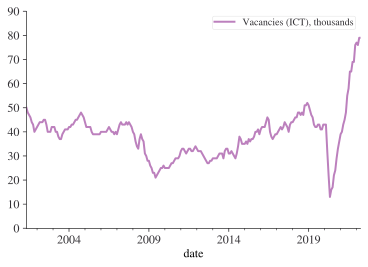

In [41]:
df.plot();

## Resampling, Rolling, and Shifting

Now our data have a *datetime index*, some common time series operations are made very easy for us.

### Resampling

Quite frequently, there is a situation in which one would like to change the frequency of a given time series. A time index-based dataframe makes this easy via the `resample` function. `resample` must be told *how* you'd like to resample the data, for example via the mean or median. Here's an example resampling the monthly data to annual and taking the mean:

In [42]:
df.resample("A").mean()

,"Vacancies (ICT), thousands"
date,
2001-12-31,44.875000
2002-12-31,42.666667
2003-12-31,39.833333
2004-12-31,44.833333
2005-12-31,40.500000
2006-12-31,40.250000
2007-12-31,42.666667
2008-12-31,35.000000
2009-12-31,24.250000


As resample is just a special type of aggregation, it can work with all of the usual functions that aggregations do, including in-built functions or user-defined functions.

In [43]:
df.resample("5A").agg(["mean", "std"]).head()

Vacancies (ICT), thousands           
                                 mean        std
date                                            
2001-12-31                  44.875000   3.482097
2006-12-31                  41.616667   2.511611
2011-12-31                  32.300000   6.832872
2016-12-31                  34.366667   4.957332
2021-12-31                  43.450000  11.899900

Resampling can go up in frequency (up-sampling) as well as down, but we no longer need to choose an aggregation function, we must now choose how we'd like to fill in the gaps for the frequencies we didn't have in the original data. In the example below, they are just left as NaNs.

In [44]:
df.resample("D").asfreq()

,"Vacancies (ICT), thousands"
date,
2001-05-31,50.0
2001-06-01,NaN
2001-06-02,NaN
2001-06-03,NaN
2001-06-04,NaN
...,...
2022-04-26,NaN
2022-04-27,NaN
2022-04-28,NaN


Options to fill in missing time series data include using `bfill` or `ffill` to fill in the blanks based on the next or last available value, respectively, or `interpolate` (note how only the first 3 NaNs are replaced using the `limit` keyword argument):

In [45]:
df.resample("D").interpolate(method="linear", limit_direction="forward", limit=3)[:6]

,"Vacancies (ICT), thousands"
date,
2001-05-31,50.000000
2001-06-01,49.933333
2001-06-02,49.866667
2001-06-03,49.800000
2001-06-04,NaN
2001-06-05,NaN


We can see the differences between the filling methods more clearly in this stock market data, following a chart by Jake Vanderplas.

In [46]:
# Get stock market data
import pandas_datareader as web

xf = web.DataReader("AAPL", "stooq", start="2017-01-01", end="2019-06-01")
xf = xf.sort_index()

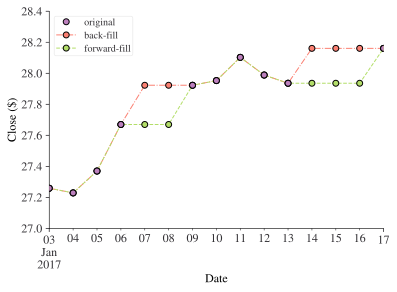

In [47]:
fig, ax = plt.subplots()
data = xf.iloc[:10, 3]
cycle = ax._get_lines.prop_cycler

data.asfreq("D").plot(ax=ax, marker="o", linestyle="None", zorder=3)
data.asfreq("D", method="bfill").plot(
    ax=ax, style="-.o", lw=1, color=next(cycle)["color"]
)
data.asfreq("D", method="ffill").plot(
    ax=ax, style="--o", lw=1, color=next(cycle)["color"]
)
ax.set_ylabel("Close ($)")
ax.legend(["original", "back-fill", "forward-fill"]);

### Rolling Window Functions

The `rolling` and `ewm` methods are both rolling window functions. The first includes functions of the sequence

$$
y_t = f(\{x_{t-i} \}_{i=0}^{i=R-1})
$$

where $R$ is the number of periods to use for the rolling window. For example, if the function is the mean, then $f$ takes the form $\frac{1}{R}\displaystyle\sum_{i=0}^{i=R-1} x_{t-i}$.

The example below is a 2-period rolling mean:

In [48]:
df.rolling(2).mean()

,"Vacancies (ICT), thousands"
date,
2001-05-31,NaN
2001-06-30,49.0
2001-07-31,47.5
2001-08-31,46.5
2001-09-30,45.0
...,...
2021-12-31,72.5
2022-01-31,76.5
2022-02-28,76.5


The `ewm` includes the class of functions where data point $x_{t-i}$ has a weight $w_i = (1-\alpha)^i$. As $0 < \alpha < 1$, points further back in time are given less weight. For example, an exponentially moving average is given by

$$
y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}
$$

The example below shows the code for the exponentially weighted moving average:

In [49]:
df.ewm(alpha=0.2).mean()

,"Vacancies (ICT), thousands"
date,
2001-05-31,50.000000
2001-06-30,48.888889
2001-07-31,48.114754
2001-08-31,47.398374
2001-09-30,46.387435
...,...
2021-12-31,61.948986
2022-01-31,64.959189
2022-02-28,67.167351


Let's see these methods together on the stock market data.

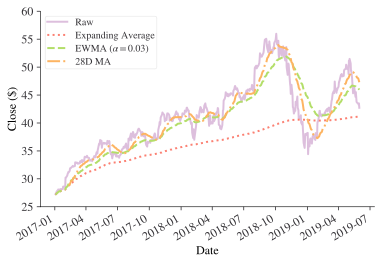

In [50]:
fig, ax = plt.subplots()
roll_num = 28
alpha = 0.03
xf["Close"].plot(label="Raw", alpha=0.5)
xf["Close"].expanding().mean().plot(label="Expanding Average", style=":")
xf["Close"].ewm(alpha=alpha).mean().plot(
    label=f"EWMA ($\\alpha=${alpha:.2f})", style="--"
)
xf["Close"].rolling(roll_num).mean().plot(label=f"{roll_num}D MA", style="-.")
ax.legend()
ax.set_ylabel("Close ($)");

For more tools to analyse stocks, see the [**Pandas TA**](https://twopirllc.github.io/pandas-ta/) package.

We can also use `rolling` as an intermediate step in creating more than one type of aggregation:

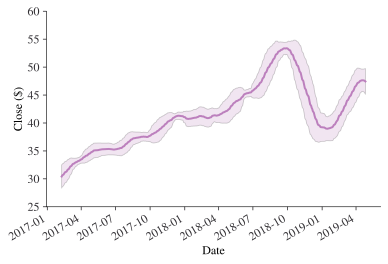

In [51]:
roll = xf["Close"].rolling(50, center=True)

fig, ax = plt.subplots()
m = roll.agg(["mean", "std"])
m["mean"].plot(ax=ax)
ax.fill_between(m.index, m["mean"] - m["std"], m["mean"] + m["std"], alpha=0.2)
ax.set_ylabel("Close ($)");

### Shifting

Shifting can move series around in time; it's what we need to create leads and lags of time series. Let's create a lead and a lag in the data. Remember that a lead is going to shift the pattern in the data to the left (ie earlier in time), while the lag is going to shift patterns later in time (ie to the right).

In [52]:
lead = 12
lag = 3
orig_series_name = df.columns[0]
df[f"lead ({lead} months)"] = df[orig_series_name].shift(-lead)
df[f"lag ({lag} months)"] = df[orig_series_name].shift(lag)
df.head()

,"Vacancies (ICT), thousands",lead (12 months),lag (3 months)
date,,,
2001-05-31,50,44.0,NaN
2001-06-30,48,45.0,NaN
2001-07-31,47,45.0,NaN
2001-08-31,46,43.0,50.0
2001-09-30,44,40.0,48.0


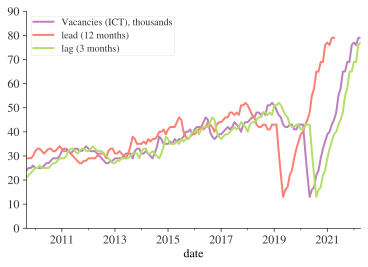

In [53]:
df.iloc[100:300, :].plot();